# Jupyter Notebook to generate filter coeffiecent values

[-1.43784223e-04 -8.36125348e-05  1.19173505e-04  4.25496657e-04
  6.94633526e-04  7.24177306e-04  3.49521545e-04 -4.34584932e-04
 -1.39563577e-03 -2.09179948e-03 -2.03164747e-03 -9.23555283e-04
  1.09077195e-03  3.35008833e-03  4.82910680e-03  4.53234580e-03
  1.99921968e-03 -2.29961235e-03 -6.90182084e-03 -9.75295479e-03
 -9.00084038e-03 -3.91590949e-03  4.45649391e-03  1.32770185e-02
  1.86909952e-02  1.72542180e-02  7.54398817e-03 -8.67689478e-03
 -2.63091689e-02 -3.80338221e-02 -3.64895345e-02 -1.68613380e-02
  2.10120036e-02  7.18301706e-02  1.25749185e-01  1.70866876e-01
  1.96551032e-01  1.96551032e-01  1.70866876e-01  1.25749185e-01
  7.18301706e-02  2.10120036e-02 -1.68613380e-02 -3.64895345e-02
 -3.80338221e-02 -2.63091689e-02 -8.67689478e-03  7.54398817e-03
  1.72542180e-02  1.86909952e-02  1.32770185e-02  4.45649391e-03
 -3.91590949e-03 -9.00084038e-03 -9.75295479e-03 -6.90182084e-03
 -2.29961235e-03  1.99921968e-03  4.53234580e-03  4.82910680e-03
  3.35008833e-03  1.09077

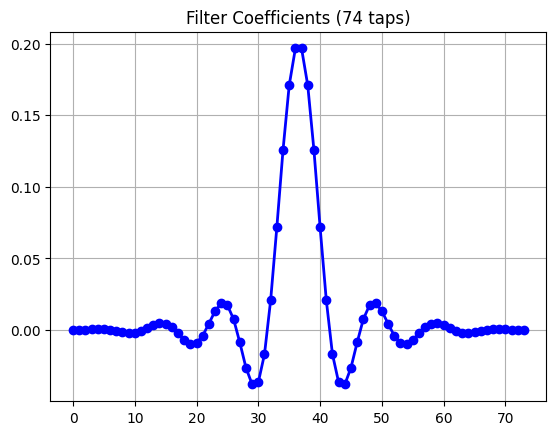

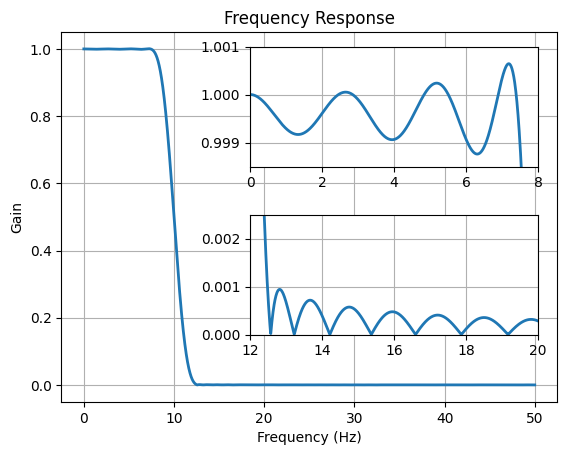

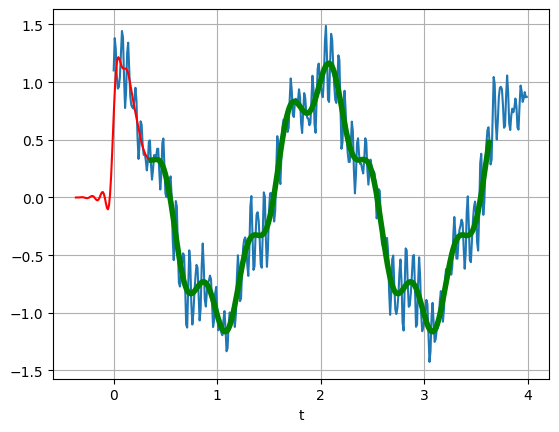

In [2]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

print(taps)
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)


In [6]:
print (taps)

for coef in taps:
    print(f'{format(coef, "#04x"):^18}')


[-1.43784223e-04 -8.36125348e-05  1.19173505e-04  4.25496657e-04
  6.94633526e-04  7.24177306e-04  3.49521545e-04 -4.34584932e-04
 -1.39563577e-03 -2.09179948e-03 -2.03164747e-03 -9.23555283e-04
  1.09077195e-03  3.35008833e-03  4.82910680e-03  4.53234580e-03
  1.99921968e-03 -2.29961235e-03 -6.90182084e-03 -9.75295479e-03
 -9.00084038e-03 -3.91590949e-03  4.45649391e-03  1.32770185e-02
  1.86909952e-02  1.72542180e-02  7.54398817e-03 -8.67689478e-03
 -2.63091689e-02 -3.80338221e-02 -3.64895345e-02 -1.68613380e-02
  2.10120036e-02  7.18301706e-02  1.25749185e-01  1.70866876e-01
  1.96551032e-01  1.96551032e-01  1.70866876e-01  1.25749185e-01
  7.18301706e-02  2.10120036e-02 -1.68613380e-02 -3.64895345e-02
 -3.80338221e-02 -2.63091689e-02 -8.67689478e-03  7.54398817e-03
  1.72542180e-02  1.86909952e-02  1.32770185e-02  4.45649391e-03
 -3.91590949e-03 -9.00084038e-03 -9.75295479e-03 -6.90182084e-03
 -2.29961235e-03  1.99921968e-03  4.53234580e-03  4.82910680e-03
  3.35008833e-03  1.09077

ValueError: Unknown format code 'x' for object of type 'float'